In [1]:
import numpy as np
#import random
#import os
#import pandas as pd
import tensorflow as tf
#import matplotlib.pyplot as plt
#!pip install mitdeeplearning
#import mitdeeplearning as mdl
#!pip install -U mxnet-cu101==1.7.0


#### **Gradient Vector - Scalar**

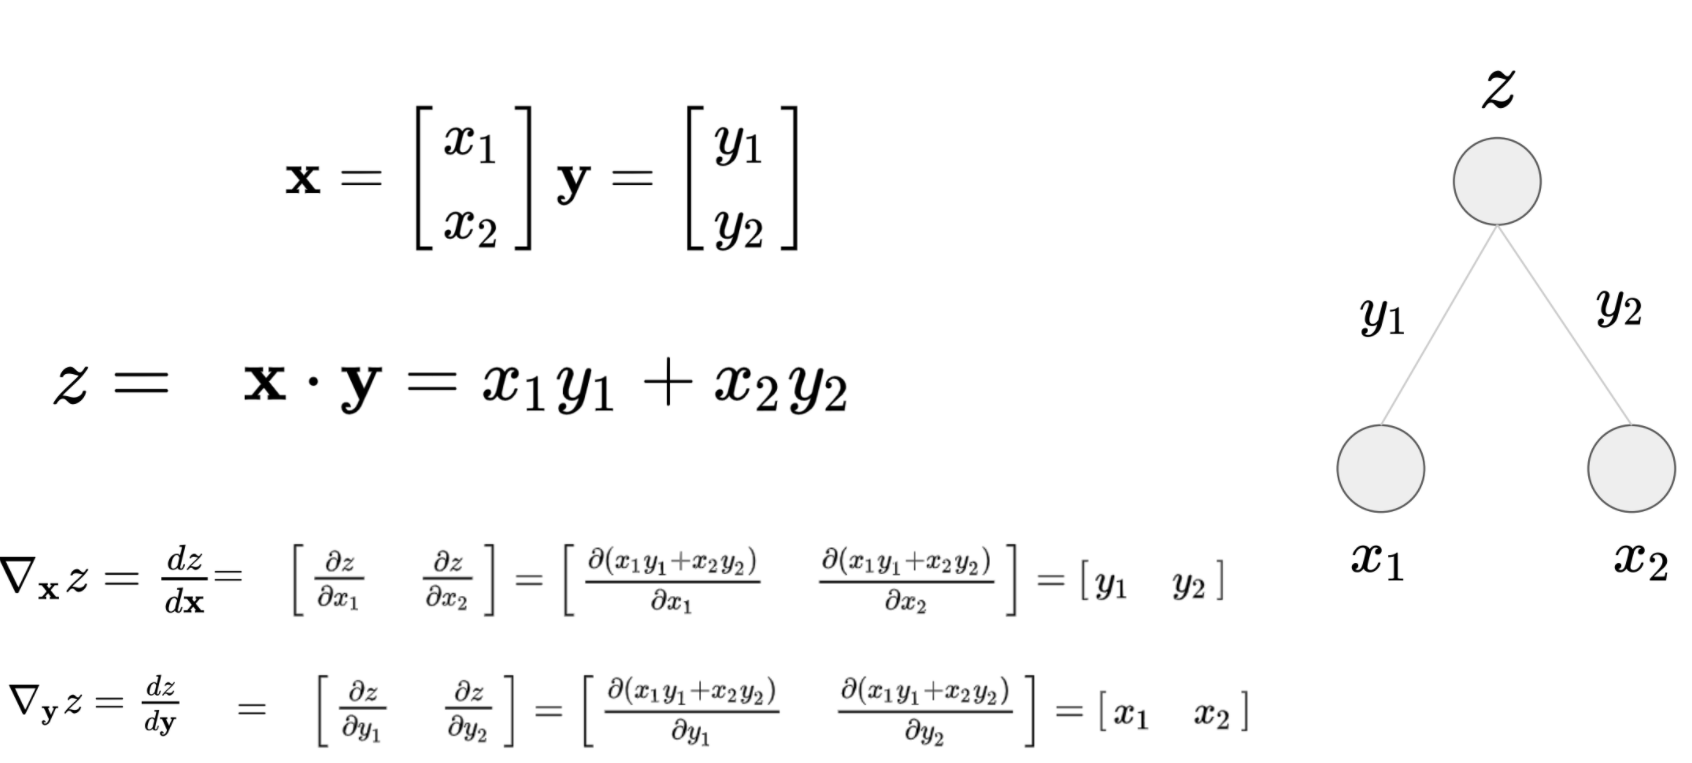

In [2]:
x = tf.constant([[1., 2.]])
y = tf.constant([[3., 4.]])
tf.matmul(x, y, transpose_b=True)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[11.]], dtype=float32)>

Whether the input is scalar or tensor, GradientTape.jacobian efficiently calculates the gradient of each element of the source with respect to each element of the target(s).

In [3]:
x = tf.constant([[1.0, 2.0]], dtype=np.float32)
y = tf.constant([[3.0, 4.0]], dtype=np.float32)
with tf.GradientTape(persistent=True) as g:
  g.watch(x)
  g.watch(y)
  z = tf.matmul(x, y, transpose_b=True)
jacobian_x = g.jacobian(z, x) # g.batch_jacobian(z, x)
jacobian_y = g.jacobian(z, y) # g.batch_jacobian(z, y)

In [4]:
print(jacobian_x)
print(jacobian_y)

tf.Tensor([[[[3. 4.]]]], shape=(1, 1, 1, 2), dtype=float32)
tf.Tensor([[[[1. 2.]]]], shape=(1, 1, 1, 2), dtype=float32)


#### **Gradient Vector - Vector**

**Ví dụ 1:**

$\textbf{y} = \textbf{x} \bigodot \textbf{x}$

In [5]:
x = tf.constant([[1., 2.]]) # tạo ra 1 vector
x*x

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1., 4.]], dtype=float32)>

In [9]:
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x
jacobian_x = g.jacobian(y, x)
# gradient_x = g.gradient(y, x)

In [7]:
jacobian_x

<tf.Tensor: shape=(1, 2, 1, 2), dtype=float32, numpy=
array([[[[2., 0.]],

        [[0., 4.]]]], dtype=float32)>

In [10]:
gradient_x

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[2., 4.]], dtype=float32)>

*Nx: Chiều của Jacobian là một ma trận trong khi đó chiều của Gradient là một vector*

Bản chất của Jacobian là cách viết chi tiết hơn của 1 Gradient

**Ví dụ 2:**

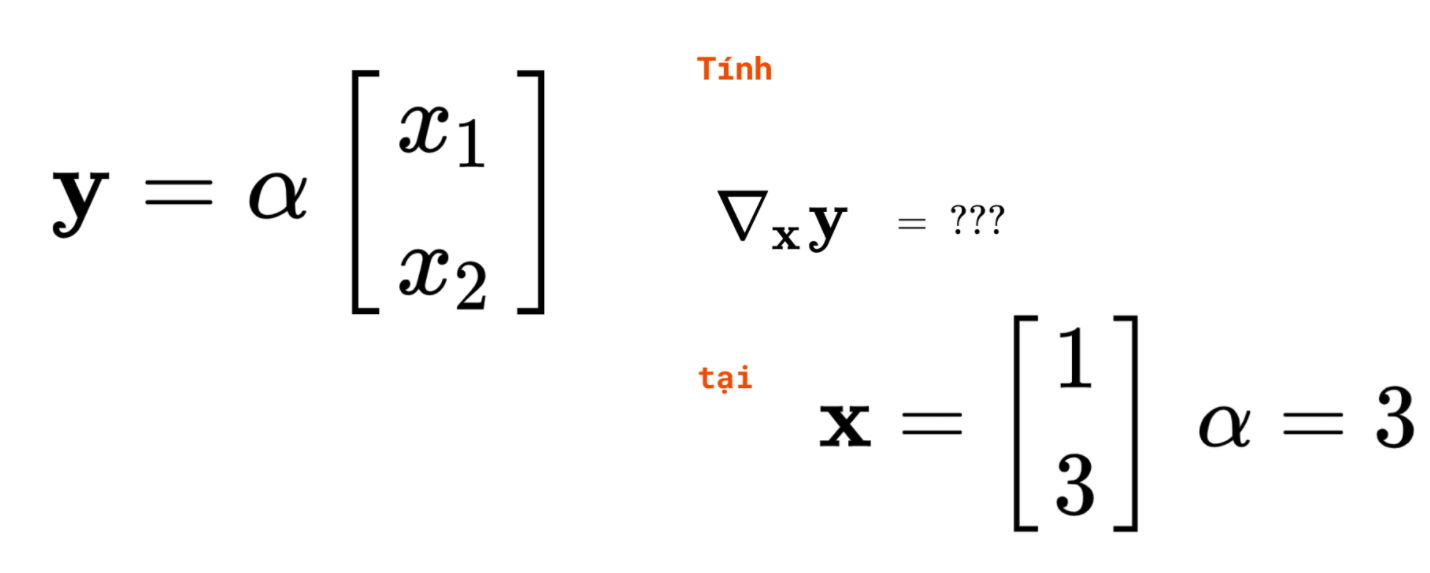

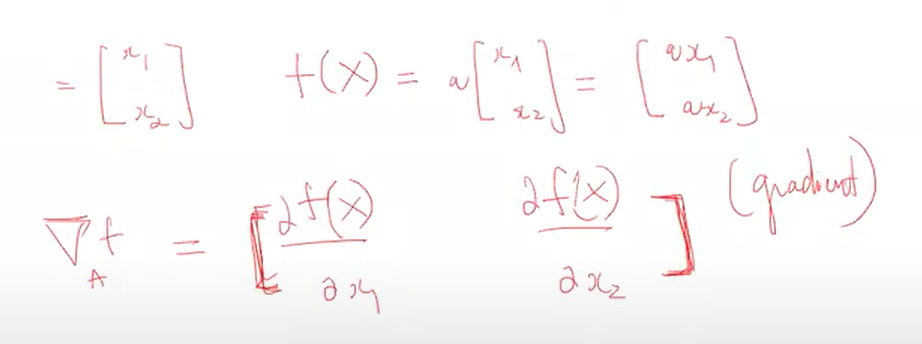

In [13]:
x = tf.constant([[1., 3.]])
a = tf.constant(3.)
with tf.GradientTape() as g:
  g.watch(x)
  y = a * x

jacobian_x = g.jacobian(y, x)
# gradient_x = g.gradient(y, x)

In [12]:
jacobian_x

<tf.Tensor: shape=(1, 2, 1, 2), dtype=float32, numpy=
array([[[[3., 0.]],

        [[0., 3.]]]], dtype=float32)>

In [14]:
gradient_x

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[3., 3.]], dtype=float32)>

**Jacobian** là một cái thể hiện Gradient chi tiết nhất có thể 

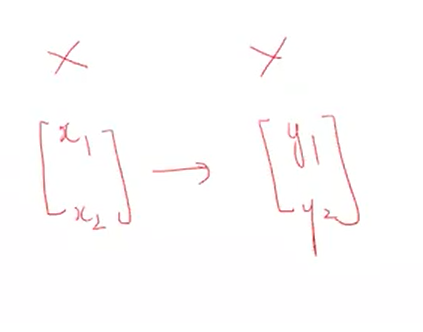

Bởi vì đạo hàm là sự ảnh hưởng của X lên Y. Vì vậy khi ta muốn tính đạo hàm của Y trên X ta phải tính đạo hàm từng phần tử trong Y với từng phàn tử trong X

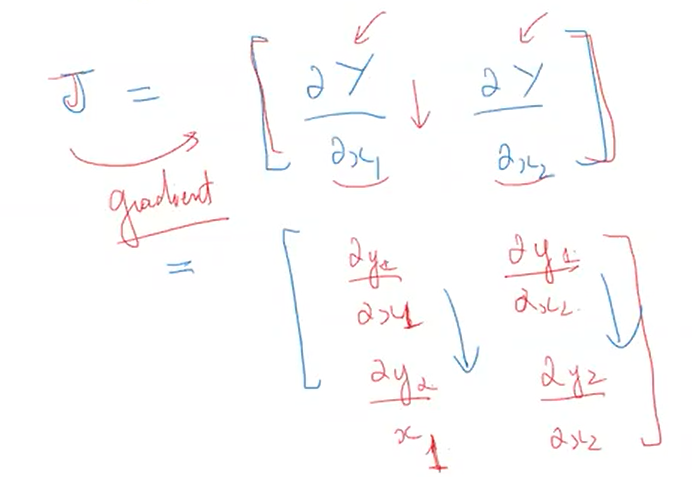

Trước đây Y chỉ là một số thôi, thì Gradient của Y chỉ là:
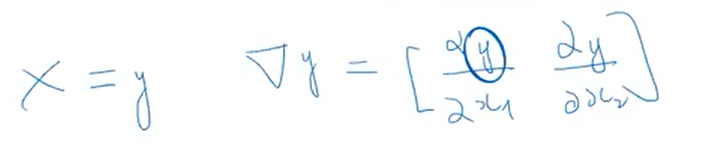

Nhưng giờ Y là một vector rồi cho nên phải mở vector ra cho nên nó kéo dài vector Gradient thành một ma trận. Ma trận này gọi là Jacobian Matrix:

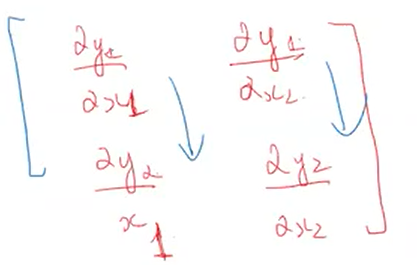

Nó thể hiện chi tiết đạo hàm của từng phần tử Y với từng phần tử X cho dù từ Matrix -> Matrix hay Tensor -> Tensor, nó sẽ tính đạo hàm của phần tử đó trên tất cả đầu vào

Quay lại Ví dụ 2:

Tính Jacobian:


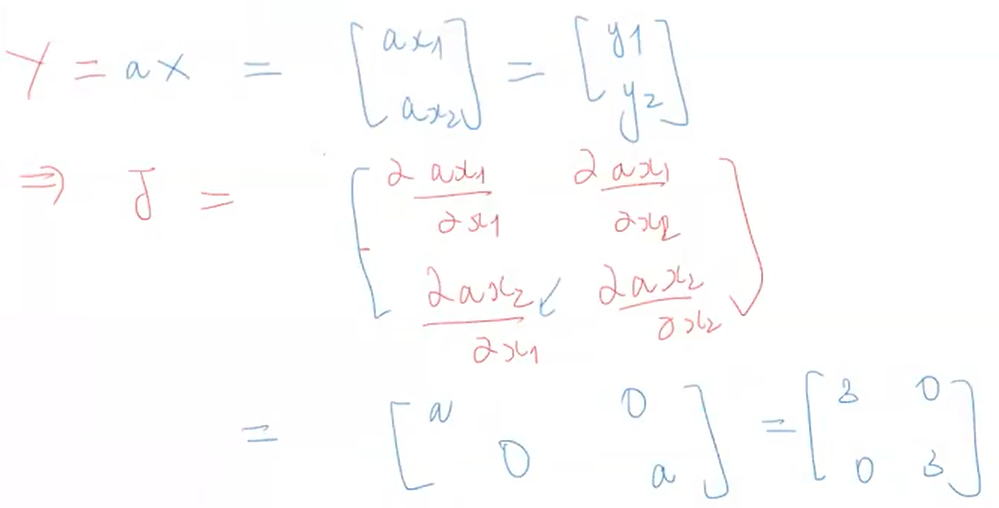

**Ví dụ 3:**

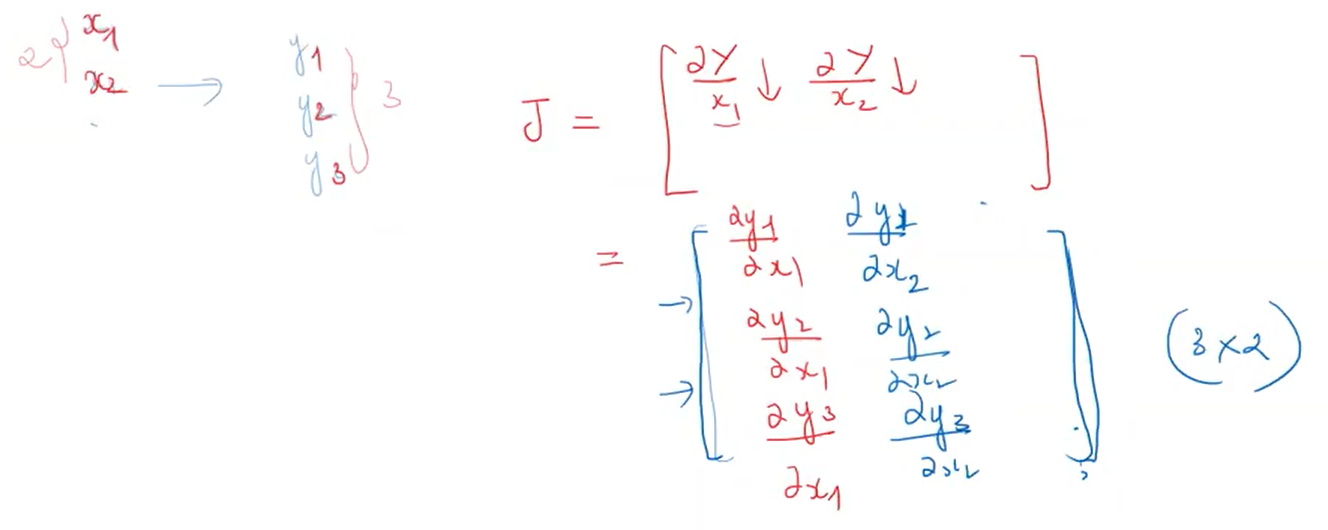

Ta vẫn có thể chuyển Jacobian về Gradient bằng cách cộng tât cả các thành phần của 1 cột của Jacobian lại với nhau

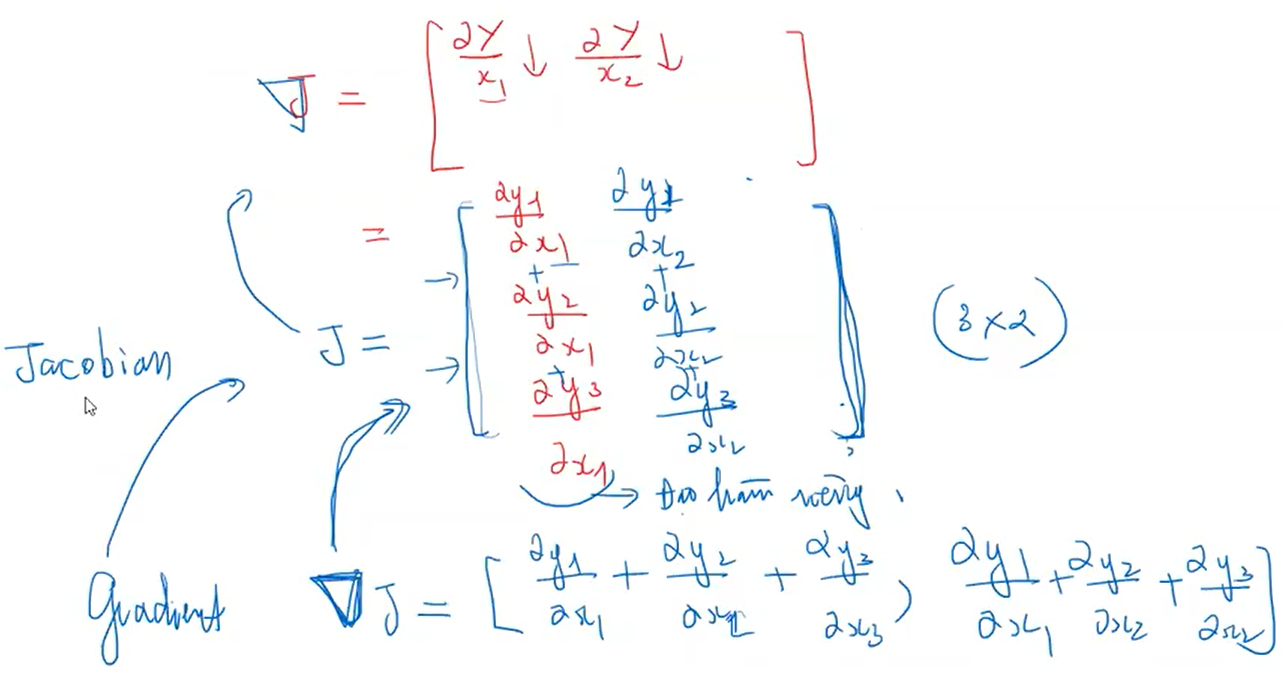

Bản chất của những cột này là những đạo hàm riêng. Có nghĩa là những cái $x_1$ | $x_2$ này ảnh hưởng đến $y_i$ nào thì nó sẽ nằm ở đây hết. Cho nên để tính chung (Gradient) thì chúng ta chỉ cần cộng gộp cột lại

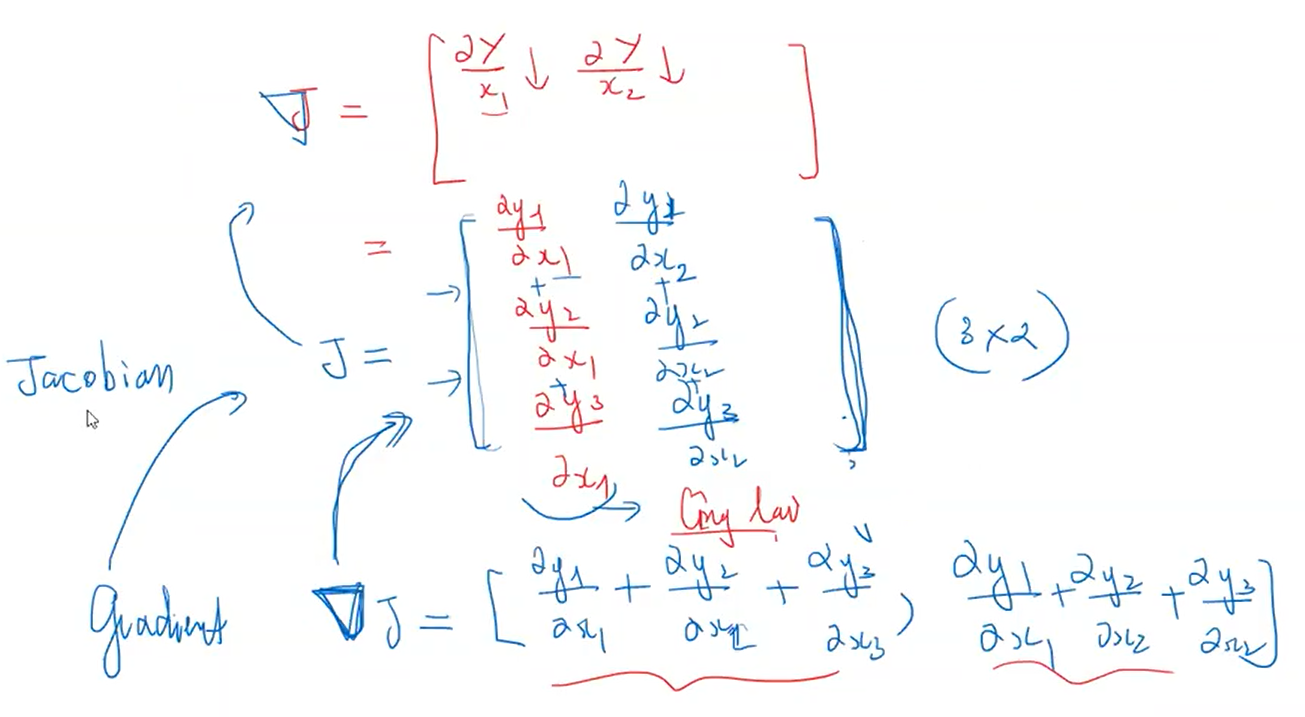

#### **Gradient matrix - matrix**

Sử dụng một ma trận nhân vào vector $x$ để ra vector $y$

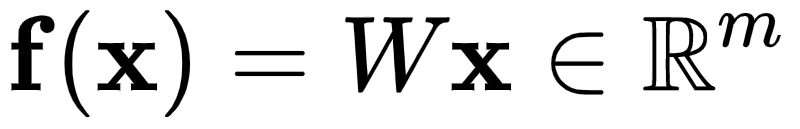

==============

**Ví dụ 1:**

==============

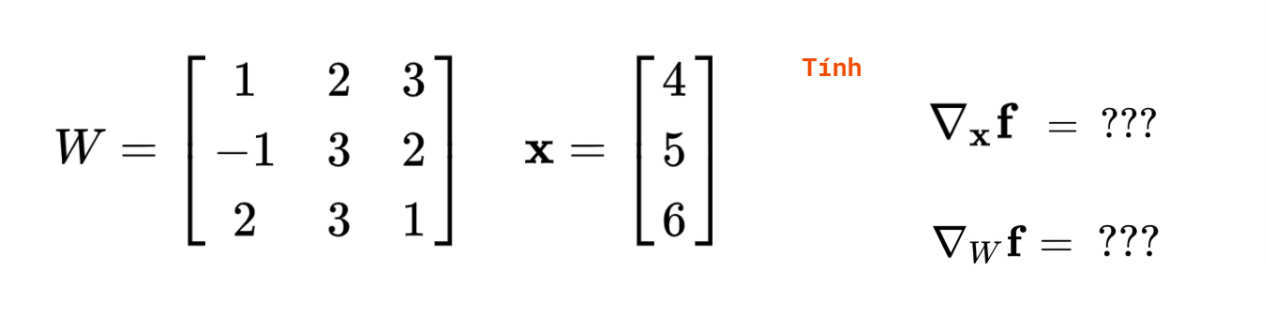

In [15]:
W = tf.constant([[1., 2., 3.], 
                 [-1., 3., 2.],
                 [2., 3., 1.]])

x = tf.constant([[4.], [5.], [6.]])
tf.matmul(W, x)

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[32.],
       [23.],
       [29.]], dtype=float32)>

In [16]:
with tf.GradientTape(persistent=True) as g:
  g.watch(W)
  g.watch(x)
  f = tf.matmul(W, x)

gradient_dW = g.gradient(f, W)
# jacobian_dW = g.jacobian(f, W)
# gradient_dx = g.gradient(f, x)
jacobian_dx = g.jacobian(f, x)
print(gradient_dW)

tf.Tensor(
[[4. 5. 6.]
 [4. 5. 6.]
 [4. 5. 6.]], shape=(3, 3), dtype=float32)


In [17]:
print(jacobian_dx) # = W
# 1 2 3
#-1 3 2
# 2 3 1

# => gradient_dx = [[2. 8. 6.]]

tf.Tensor(
[[[[ 1.]
   [ 2.]
   [ 3.]]]


 [[[-1.]
   [ 3.]
   [ 2.]]]


 [[[ 2.]
   [ 3.]
   [ 1.]]]], shape=(3, 1, 3, 1), dtype=float32)


**Phân tích (theo x):**

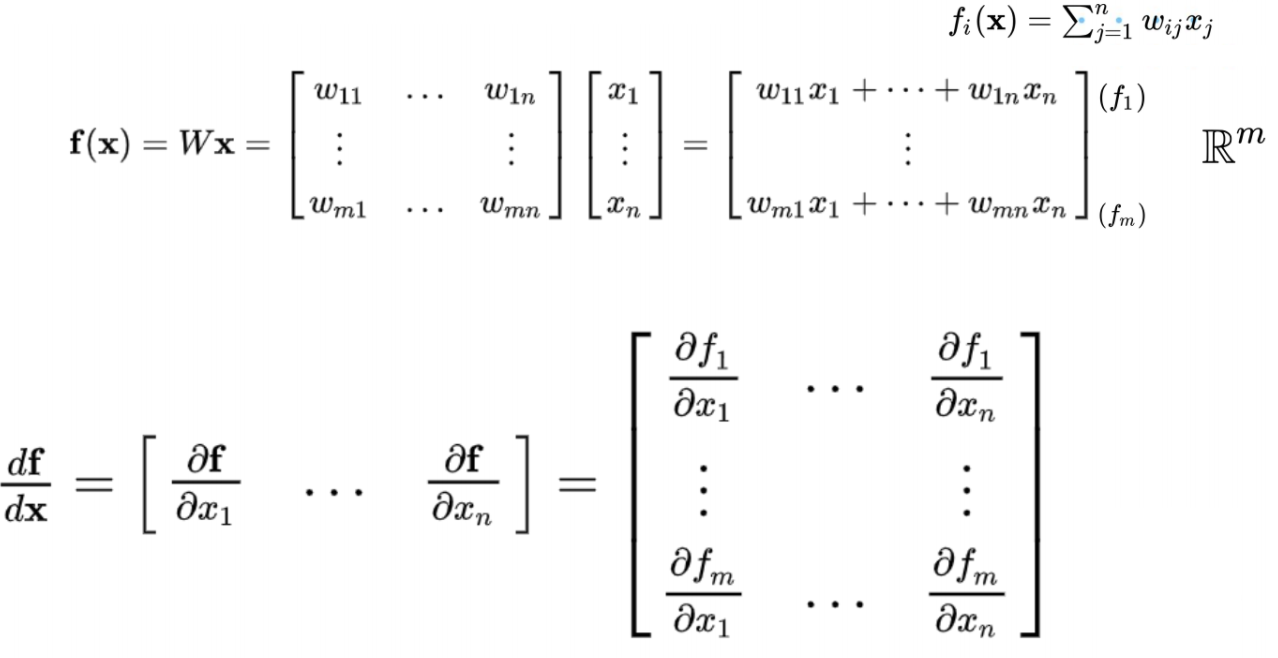

===================================================================================================================

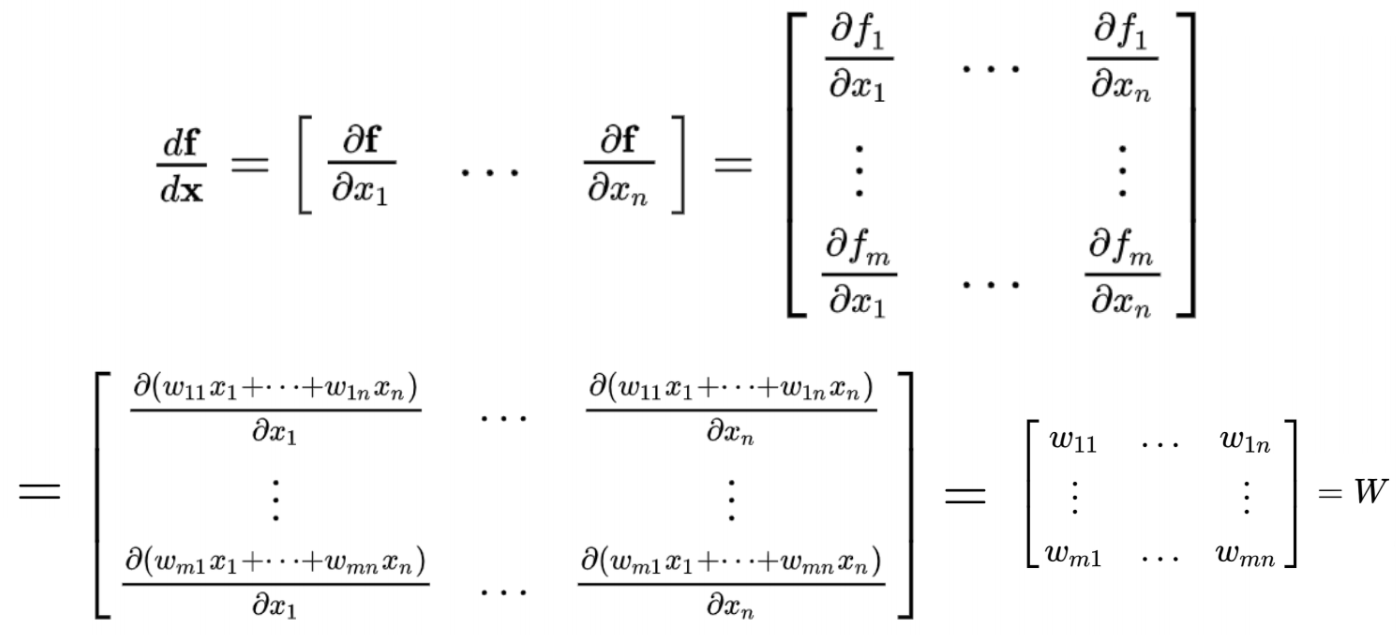

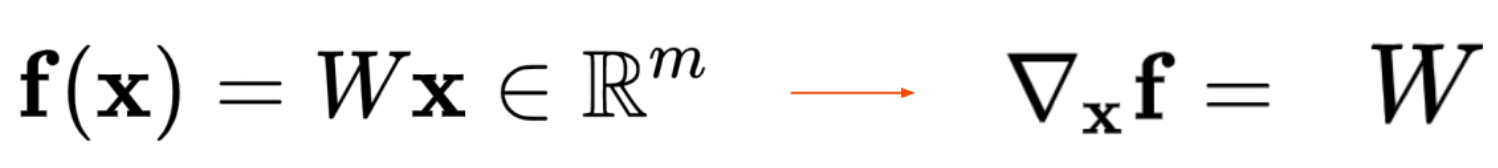

**Phân tích (theo W):**

Đạo hàm của Vector ở trên W

*Ma trận -> Vector*

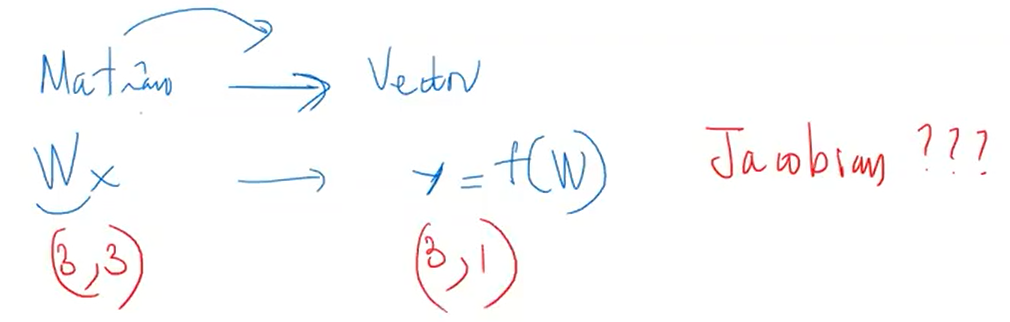

Ques: Jacobian có chiều thế nào?

Phân tích :
+ Bản chất của Gradient là chúng ta tính tất cả sự ảnh hưởng của tất cả những phần tử trong dữ liệu của chúng ta (Ma trận thì nó là trong ma trận, Vector thì nó là trong Vector) đến kết quả.
$=>$ Vì vậy Gradient của chúng ta là ($x_1$, $x_2$) thì chiều Gradient cũng là ($x_1$, $x_2$)



Còn nếu ta có ma trận $W$ (3, 3):

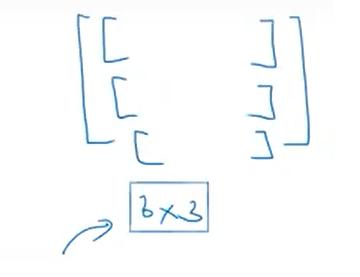

Và $Y$ (3, 1):

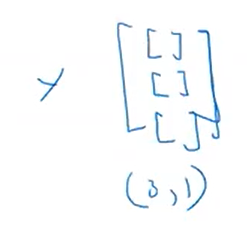

Thì ta lấy từng phần tử trong $Y$ ta đạo hàm lên $W$:

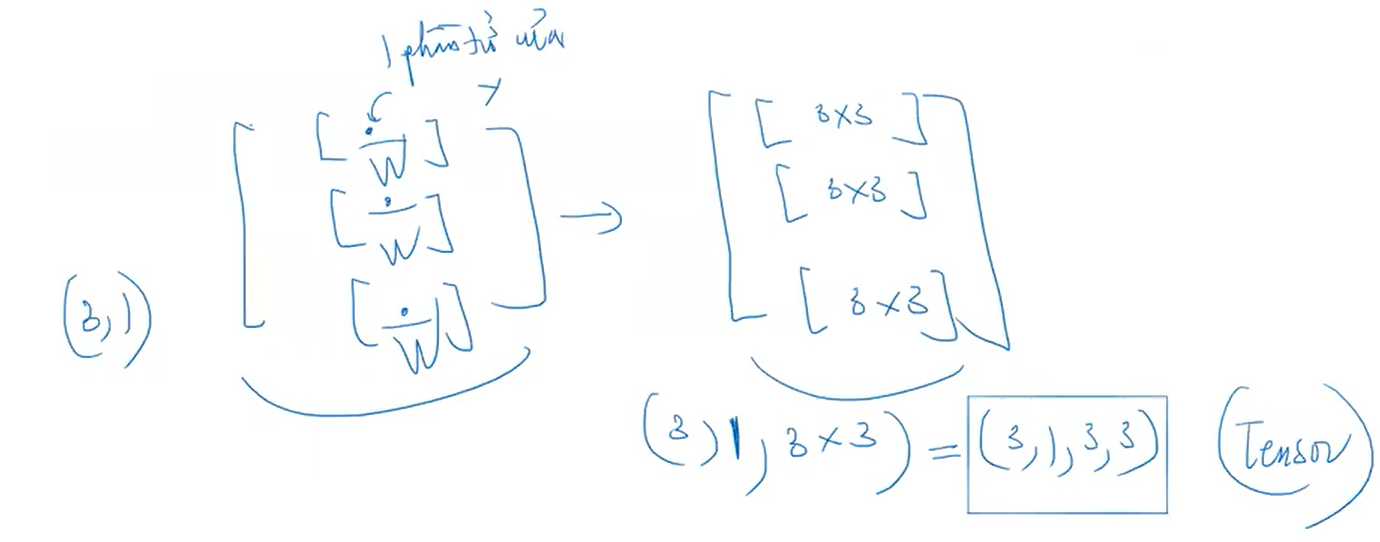

Có 3 dòng, 1 cột, mỗi 1 cái bên trong lại là ma trận 3x3

Vậy nhìn nhanh, Jacobian có chiều ($Y , W$) tức là (3, 1, 3, 3)

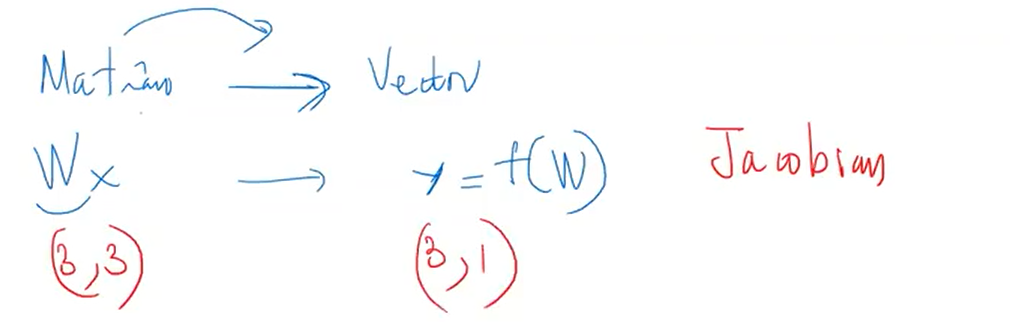

Ví dụ khác: Biến một ma trận $W(3, 2)$ -> Ma trận $Y(2, 4)$ thì ta cũng đi theo $Y$ trước rồi $W$ sau: (2, 4, 3, 2)

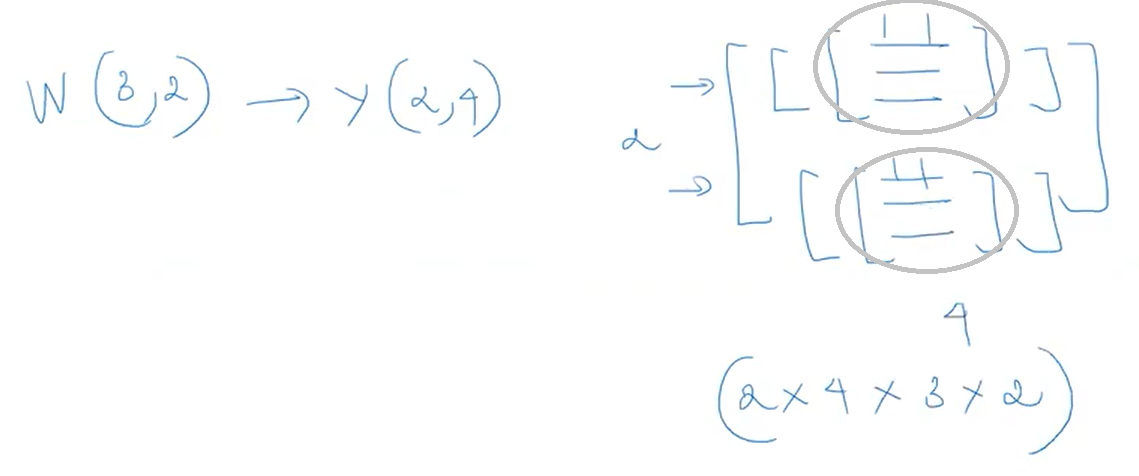

Trong mỗi phần tử (Khoanh bút chì) lại có một ma trận 3x2 nữa thì sẽ thành một Tensor cỡ (2 x 4 x 3 x 2) - Vector có 2 dòng, 4 cột, trong mỗi phần lại có một ma trận 3x2:

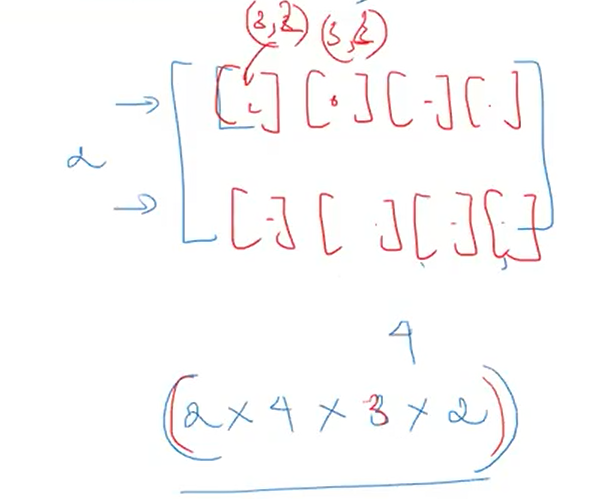

Chiều của Jacobian : (Chiều của kết quả x Chiều của đầu vào)

==============

**Ví dụ 2:**

==============

$
A = \begin{bmatrix}
1 & 2 \\ 
3 & 4
\end{bmatrix}
$  $B = \begin{bmatrix}
5 & 6 \\ 
7 & 8
\end{bmatrix} $  $ C = A \cdot B $. Tính $\nabla_{A}{C}$ và Jacobian tương ứng. 

In [18]:
A = tf.constant([[1, 2], [3, 4]], dtype=np.float32) # Dự đoán cỡ Jacobian của A sẽ là (2 x 2 x 2 x 2)
B = tf.constant([[5, 6], [7, 8]], dtype=np.float32) # B tương tự
# A = tf.constant([[1., 2.], [3., 4.]]) # Dự đoán cỡ Jacobian của A sẽ là (2 x 2 x 2 x 2)
# B = tf.constant([[5., 6.], [7., 8.]]) # B tương tự
tf.matmul(A, B)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[19., 22.],
       [43., 50.]], dtype=float32)>

In [19]:
with tf.GradientTape(persistent=True) as g:
  g.watch(A)
  g.watch(B)
  C = tf.matmul(A, B)

gradient_A = g.gradient(C, A)
jacobian_A = g.jacobian(C, A)
gradient_B = g.gradient(C, B)
jacobian_B = g.jacobian(C, B)

In [20]:
gradient_A
# gradient_B

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[11., 15.],
       [11., 15.]], dtype=float32)>

In [21]:
jacobian_A
# jacobian_B

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[5., 7.],
         [0., 0.]],

        [[6., 8.],
         [0., 0.]]],


       [[[0., 0.],
         [5., 7.]],

        [[0., 0.],
         [6., 8.]]]], dtype=float32)>

In [22]:
jacobian_A.shape
# jacobian_B.shape

TensorShape([2, 2, 2, 2])